In [ ]:
# CNN : 컨볼류션 계층, 폴링계층을 통해 특징을 모아서 최종분류
# 컨볼류션 - 폴링 - 컨볼류션 - 폴링 - 일반신경망 - 일반신경망 - 결과
# 커널 이나 필터 : 3 X 3 / 5 X 5


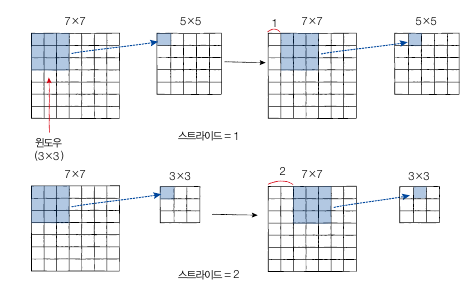

In [ ]:
# Output_size = ((Input_size - Kernel_size + 2 * Padding) / Stride) + 1

In [ ]:
# ccpd ccpd fd fd 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets
import numpy as np


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' 

In [85]:
# 하이퍼 파라메터
EPOCH = 5
BATCH_SIZE = 64
EPOCH = 40
BATCH_SIZE = 64

In [86]:
datasets.FashionMNIST

torchvision.datasets.mnist.FashionMNIST

In [87]:
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./data',
                          train = True,
                          download = True,
                          transform = transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize( (0.5,),(0.5,)  )
                          ])
    ),
    batch_size = BATCH_SIZE, shuffle = True
)

In [88]:
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./data',
                          train = False,
                          download = True,
                          transform = transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize( (0.5,),(0.5,)  )
                          ])
    ),
    batch_size = BATCH_SIZE, shuffle = True
)

In [89]:
for i in train_loader:
  print(i[0].shape)
  break

torch.Size([64, 1, 28, 28])


In [90]:
class CNN(nn.Module):
  def __init__(self ):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(1,10,kernel_size=5)
    self.conv2 = nn.Conv2d(10,20,kernel_size=5)
    self.drop = nn.Dropout2d()
    self.relu = nn.LeakyReLU()
    self.mp = nn.MaxPool2d(2)

    self.fc1 = nn.Linear(320,50)  # (20,4,4)
    self.fc2 = nn.Linear(50,10)
  def forward(self, x):
    x = self.relu(self.mp(self.conv1(x)) )    
    x = self.relu(self.mp(self.conv2(x)) )    
    
    x = x.view(-1,320)    
    x = self.relu( self.fc1(x))
    x = self.drop(x)
    x = self.fc2(x)
    return F.log_softmax(x,  dim=1)    
    return x

In [91]:
model = CNN().to(device)
op = optim.SGD(model.parameters(), lr = 1e-2, momentum=0.5)

In [92]:
# 학습함수
from tqdm import tqdm
def train(model,train_loader, optimizer, epoch):
  model.train()
  for idx , (data, label) in tqdm(enumerate(train_loader)):
    data, label = data.to(device), label.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = F.cross_entropy(output, label)
    loss.backward()
    optimizer.step()
    if idx % 100 == 0:
      print(f"train epoch:{epoch} loss : {loss.item()}")

def evaluate(model,test_loader):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for idx , (data, label) in tqdm(enumerate(test_loader)):
      data, label = data.to(device), label.to(device)
      
      output = model(data)      
      # 배치오차 합산
      test_loss += F.cross_entropy(output, label,reduction='sum').item()
      # 가장 높은 값을 가진 인덱스가 예측값
      pred = output.max(1, keepdim=True)[1]
      correct += pred.eq(label.view_as(pred)).sum().item()
  test_loss /= len(test_loader.dataset)
  test_accuracy = 100*correct / len(test_loader.dataset)
  return test_loss, test_accuracy     

In [93]:
for epoch in range(1,EPOCH+1):
  train(model, train_loader, op,epoch)
  test_loss, test_accuracy =  evaluate(model,test_loader)
  print(f"[{epoch}] test loss : {test_loss:.4f} accuracy : {test_accuracy}")

2it [00:00, 16.85it/s]

train epoch:1 loss : 2.2978219985961914


105it [00:04, 26.15it/s]

train epoch:1 loss : 2.180541753768921


204it [00:08, 24.99it/s]

train epoch:1 loss : 1.4468023777008057


303it [00:12, 22.85it/s]

train epoch:1 loss : 0.937128484249115


406it [00:17, 25.75it/s]

train epoch:1 loss : 1.3145872354507446


505it [00:21, 26.09it/s]

train epoch:1 loss : 0.9837087988853455


604it [00:25, 26.47it/s]

train epoch:1 loss : 0.7639232277870178


704it [00:29, 26.71it/s]

train epoch:1 loss : 0.8758420944213867


806it [00:33, 25.90it/s]

train epoch:1 loss : 0.7515295147895813


905it [00:37, 25.96it/s]

train epoch:1 loss : 0.8788120150566101


938it [00:39, 23.89it/s]
157it [00:04, 33.58it/s]


[1] test loss : 0.6945 accuracy : 74.24


3it [00:00, 24.92it/s]

train epoch:2 loss : 0.8709802627563477


105it [00:03, 26.11it/s]

train epoch:2 loss : 0.599075436592102


204it [00:07, 19.64it/s]

train epoch:2 loss : 0.7121943831443787


305it [00:12, 26.33it/s]

train epoch:2 loss : 0.8605710864067078


404it [00:16, 26.62it/s]

train epoch:2 loss : 0.7898582816123962


506it [00:20, 26.32it/s]

train epoch:2 loss : 0.675163984298706


606it [00:24, 26.06it/s]

train epoch:2 loss : 0.6296711564064026


705it [00:28, 26.01it/s]

train epoch:2 loss : 0.5603660941123962


804it [00:32, 25.12it/s]

train epoch:2 loss : 0.702774167060852


906it [00:37, 25.36it/s]

train epoch:2 loss : 0.6429320573806763


938it [00:38, 24.32it/s]
157it [00:04, 38.21it/s]


[2] test loss : 0.5928 accuracy : 77.31


3it [00:00, 26.64it/s]

train epoch:3 loss : 0.6285540461540222


103it [00:04, 18.89it/s]

train epoch:3 loss : 0.9873747825622559


204it [00:08, 26.76it/s]

train epoch:3 loss : 0.6126832962036133


306it [00:12, 26.33it/s]

train epoch:3 loss : 0.6301647424697876


402it [00:16, 25.82it/s]

train epoch:3 loss : 0.5300581455230713


505it [00:21, 26.93it/s]

train epoch:3 loss : 0.6292366981506348


604it [00:24, 26.43it/s]

train epoch:3 loss : 0.6270517706871033


706it [00:28, 26.48it/s]

train epoch:3 loss : 0.6451468467712402


805it [00:33, 26.53it/s]

train epoch:3 loss : 0.6568751335144043


904it [00:37, 26.40it/s]

train epoch:3 loss : 0.599177896976471


938it [00:38, 24.20it/s]
157it [00:04, 34.63it/s]


[3] test loss : 0.5342 accuracy : 79.23


2it [00:00, 17.41it/s]

train epoch:4 loss : 0.6649395227432251


104it [00:04, 23.81it/s]

train epoch:4 loss : 0.8021900653839111


206it [00:08, 26.01it/s]

train epoch:4 loss : 0.7638326287269592


304it [00:12, 18.89it/s]

train epoch:4 loss : 0.7268463373184204


405it [00:17, 25.41it/s]

train epoch:4 loss : 0.6706006526947021


504it [00:21, 26.34it/s]

train epoch:4 loss : 0.577875018119812


603it [00:24, 24.60it/s]

train epoch:4 loss : 0.6549125909805298


706it [00:29, 26.29it/s]

train epoch:4 loss : 0.5295824408531189


805it [00:33, 26.55it/s]

train epoch:4 loss : 0.4665791094303131


904it [00:37, 26.19it/s]

train epoch:4 loss : 0.42952480912208557


938it [00:39, 23.90it/s]
157it [00:04, 33.95it/s]


[4] test loss : 0.5118 accuracy : 79.85


3it [00:00, 26.62it/s]

train epoch:5 loss : 0.6602983474731445


105it [00:04, 26.14it/s]

train epoch:5 loss : 0.6282346248626709


203it [00:08, 17.39it/s]

train epoch:5 loss : 0.5223866701126099


304it [00:12, 25.69it/s]

train epoch:5 loss : 0.6572404503822327


406it [00:16, 26.60it/s]

train epoch:5 loss : 0.4043430984020233


503it [00:20, 17.84it/s]

train epoch:5 loss : 0.7411772012710571


605it [00:25, 25.92it/s]

train epoch:5 loss : 0.5093773007392883


704it [00:29, 25.96it/s]

train epoch:5 loss : 0.5385466814041138


803it [00:32, 21.28it/s]

train epoch:5 loss : 0.4732236862182617


905it [00:37, 25.93it/s]

train epoch:5 loss : 0.8373011350631714


938it [00:39, 24.02it/s]
157it [00:04, 38.00it/s]


[5] test loss : 0.4851 accuracy : 81.38


3it [00:00, 24.97it/s]

train epoch:6 loss : 0.33482855558395386


103it [00:04, 17.04it/s]

train epoch:6 loss : 0.5796545743942261


205it [00:08, 26.11it/s]

train epoch:6 loss : 0.5572342276573181


304it [00:12, 26.26it/s]

train epoch:6 loss : 0.583278477191925


403it [00:17, 17.40it/s]

train epoch:6 loss : 0.7329562902450562


506it [00:21, 26.48it/s]

train epoch:6 loss : 0.4223993122577667


605it [00:25, 26.52it/s]

train epoch:6 loss : 0.4029788672924042


703it [00:29, 17.66it/s]

train epoch:6 loss : 0.5307802557945251


806it [00:33, 25.92it/s]

train epoch:6 loss : 0.40946829319000244


905it [00:37, 26.22it/s]

train epoch:6 loss : 0.4474588632583618


938it [00:39, 24.02it/s]
157it [00:05, 31.17it/s]


[6] test loss : 0.4553 accuracy : 82.89


3it [00:00, 24.47it/s]

train epoch:7 loss : 0.5268482565879822


105it [00:04, 25.84it/s]

train epoch:7 loss : 0.7288395166397095


204it [00:07, 26.57it/s]

train epoch:7 loss : 0.31490546464920044


304it [00:12, 16.53it/s]

train epoch:7 loss : 0.494058221578598


404it [00:16, 26.39it/s]

train epoch:7 loss : 0.5978030562400818


506it [00:20, 25.87it/s]

train epoch:7 loss : 0.4317055940628052


603it [00:25, 17.47it/s]

train epoch:7 loss : 0.4712257385253906


705it [00:29, 25.35it/s]

train epoch:7 loss : 0.4120708405971527


804it [00:33, 25.17it/s]

train epoch:7 loss : 0.3842605948448181


904it [00:37, 17.44it/s]

train epoch:7 loss : 0.5781832933425903


938it [00:39, 23.77it/s]
157it [00:04, 37.87it/s]


[7] test loss : 0.4314 accuracy : 84.16


3it [00:00, 23.53it/s]

train epoch:8 loss : 0.8888000845909119


105it [00:04, 24.25it/s]

train epoch:8 loss : 0.46318796277046204


205it [00:09, 25.82it/s]

train epoch:8 loss : 0.6041320562362671


304it [00:12, 25.62it/s]

train epoch:8 loss : 0.3627163767814636


406it [00:16, 25.93it/s]

train epoch:8 loss : 0.5128471851348877


504it [00:21, 23.87it/s]

train epoch:8 loss : 0.5435121059417725


606it [00:25, 25.70it/s]

train epoch:8 loss : 0.454712450504303


705it [00:29, 26.59it/s]

train epoch:8 loss : 0.4902498424053192


803it [00:34, 16.67it/s]

train epoch:8 loss : 0.5334377884864807


905it [00:37, 27.12it/s]

train epoch:8 loss : 0.31773439049720764


938it [00:39, 23.94it/s]
157it [00:04, 38.17it/s]


[8] test loss : 0.4222 accuracy : 84.27


3it [00:00, 25.66it/s]

train epoch:9 loss : 0.4922334551811218


104it [00:04, 26.20it/s]

train epoch:9 loss : 0.5221195816993713


206it [00:08, 26.82it/s]

train epoch:9 loss : 0.3650822043418884


305it [00:12, 26.01it/s]

train epoch:9 loss : 0.37287336587905884


406it [00:17, 25.17it/s]

train epoch:9 loss : 0.4312264323234558


505it [00:21, 25.69it/s]

train epoch:9 loss : 0.564388632774353


604it [00:25, 26.17it/s]

train epoch:9 loss : 0.32645925879478455


706it [00:30, 23.46it/s]

train epoch:9 loss : 0.5087829232215881


805it [00:34, 25.44it/s]

train epoch:9 loss : 0.6938279271125793


904it [00:37, 26.44it/s]

train epoch:9 loss : 0.5614746809005737


938it [00:39, 23.91it/s]
157it [00:05, 30.76it/s]


[9] test loss : 0.4149 accuracy : 84.76


3it [00:00, 26.40it/s]

train epoch:10 loss : 0.4774972200393677


105it [00:03, 25.62it/s]

train epoch:10 loss : 0.4076736569404602


204it [00:07, 25.88it/s]

train epoch:10 loss : 0.5325814485549927


305it [00:12, 26.76it/s]

train epoch:10 loss : 0.3621712625026703


404it [00:16, 26.30it/s]

train epoch:10 loss : 0.4951498210430145


506it [00:20, 26.22it/s]

train epoch:10 loss : 0.3857441246509552


606it [00:25, 25.95it/s]

train epoch:10 loss : 0.48340272903442383


705it [00:28, 26.28it/s]

train epoch:10 loss : 0.4873484671115875


804it [00:32, 26.50it/s]

train epoch:10 loss : 0.23913641273975372


906it [00:37, 22.60it/s]

train epoch:10 loss : 0.766239583492279


938it [00:38, 24.20it/s]
157it [00:04, 38.12it/s]


[10] test loss : 0.3888 accuracy : 85.79


3it [00:00, 24.81it/s]

train epoch:11 loss : 0.27747809886932373


105it [00:03, 26.54it/s]

train epoch:11 loss : 0.43722769618034363


206it [00:08, 25.67it/s]

train epoch:11 loss : 0.6968671679496765


305it [00:12, 26.28it/s]

train epoch:11 loss : 0.4669010043144226


404it [00:16, 26.15it/s]

train epoch:11 loss : 0.5221644043922424


504it [00:21, 26.67it/s]

train epoch:11 loss : 0.7491494417190552


606it [00:25, 25.79it/s]

train epoch:11 loss : 0.49328258633613586


705it [00:28, 25.97it/s]

train epoch:11 loss : 0.4544823467731476


806it [00:33, 25.34it/s]

train epoch:11 loss : 0.2704460322856903


905it [00:37, 25.96it/s]

train epoch:11 loss : 0.48381441831588745


938it [00:38, 24.20it/s]
157it [00:04, 38.19it/s]


[11] test loss : 0.3898 accuracy : 85.21


3it [00:00, 25.91it/s]

train epoch:12 loss : 0.4766930341720581


105it [00:05, 26.00it/s]

train epoch:12 loss : 0.6191278100013733


204it [00:08, 26.29it/s]

train epoch:12 loss : 0.3571659028530121


303it [00:12, 25.45it/s]

train epoch:12 loss : 0.36662375926971436


404it [00:17, 25.71it/s]

train epoch:12 loss : 0.6536810398101807


506it [00:21, 25.60it/s]

train epoch:12 loss : 0.5793985724449158


605it [00:25, 25.77it/s]

train epoch:12 loss : 0.4895334839820862


706it [00:30, 25.90it/s]

train epoch:12 loss : 0.44348227977752686


805it [00:33, 25.44it/s]

train epoch:12 loss : 0.4270745515823364


904it [00:37, 25.94it/s]

train epoch:12 loss : 0.4567372500896454


938it [00:39, 24.03it/s]
157it [00:05, 30.96it/s]


[12] test loss : 0.3707 accuracy : 85.93


3it [00:00, 22.22it/s]

train epoch:13 loss : 0.43005138635635376


105it [00:04, 25.08it/s]

train epoch:13 loss : 0.3741381764411926


204it [00:08, 22.83it/s]

train epoch:13 loss : 0.5933102965354919


304it [00:12, 26.49it/s]

train epoch:13 loss : 0.5626691579818726


406it [00:16, 26.58it/s]

train epoch:13 loss : 0.4801560342311859


505it [00:20, 26.02it/s]

train epoch:13 loss : 0.6039062142372131


605it [00:25, 25.87it/s]

train epoch:13 loss : 0.5143073201179504


704it [00:29, 26.30it/s]

train epoch:13 loss : 0.3264671564102173


806it [00:33, 26.24it/s]

train epoch:13 loss : 0.3277825117111206


904it [00:37, 25.56it/s]

train epoch:13 loss : 0.33496415615081787


938it [00:39, 23.97it/s]
157it [00:04, 37.90it/s]


[13] test loss : 0.3731 accuracy : 86.27


3it [00:00, 23.51it/s]

train epoch:14 loss : 0.2986660599708557


104it [00:04, 18.75it/s]

train epoch:14 loss : 0.4223898649215698


203it [00:08, 25.54it/s]

train epoch:14 loss : 0.4559975266456604


305it [00:12, 26.33it/s]

train epoch:14 loss : 0.41190052032470703


404it [00:16, 26.39it/s]

train epoch:14 loss : 0.530177652835846


505it [00:21, 25.82it/s]

train epoch:14 loss : 0.41684362292289734


604it [00:25, 27.08it/s]

train epoch:14 loss : 0.4038917124271393


706it [00:28, 25.81it/s]

train epoch:14 loss : 0.3056427240371704


805it [00:33, 25.38it/s]

train epoch:14 loss : 0.34261783957481384


904it [00:37, 26.18it/s]

train epoch:14 loss : 0.4995570182800293


938it [00:38, 24.10it/s]
157it [00:04, 35.13it/s]


[14] test loss : 0.3683 accuracy : 86.25


2it [00:00, 13.74it/s]

train epoch:15 loss : 0.4701201617717743


105it [00:04, 25.69it/s]

train epoch:15 loss : 0.3047180473804474


204it [00:08, 26.73it/s]

train epoch:15 loss : 0.3355451822280884


303it [00:12, 21.07it/s]

train epoch:15 loss : 0.38424426317214966


406it [00:17, 26.08it/s]

train epoch:15 loss : 0.2993509769439697


505it [00:21, 25.74it/s]

train epoch:15 loss : 0.5042582750320435


604it [00:24, 26.39it/s]

train epoch:15 loss : 0.28150662779808044


704it [00:29, 26.25it/s]

train epoch:15 loss : 0.4767836034297943


806it [00:33, 26.07it/s]

train epoch:15 loss : 0.47300341725349426


905it [00:37, 26.64it/s]

train epoch:15 loss : 0.29873228073120117


938it [00:38, 24.12it/s]
157it [00:04, 32.53it/s]


[15] test loss : 0.3540 accuracy : 86.84


3it [00:00, 23.29it/s]

train epoch:16 loss : 0.2879628837108612


105it [00:04, 27.38it/s]

train epoch:16 loss : 0.33904504776000977


204it [00:07, 19.72it/s]

train epoch:16 loss : 0.7648792862892151


304it [00:12, 26.25it/s]

train epoch:16 loss : 0.5329682230949402


403it [00:16, 25.04it/s]

train epoch:16 loss : 0.6603034734725952


505it [00:20, 26.45it/s]

train epoch:16 loss : 0.5599180459976196


605it [00:25, 25.48it/s]

train epoch:16 loss : 0.5097754597663879


704it [00:29, 26.44it/s]

train epoch:16 loss : 0.49617183208465576


806it [00:33, 25.64it/s]

train epoch:16 loss : 0.48144131898880005


904it [00:37, 26.25it/s]

train epoch:16 loss : 0.467477023601532


938it [00:39, 23.95it/s]
157it [00:04, 37.78it/s]


[16] test loss : 0.3516 accuracy : 87.16


3it [00:00, 24.69it/s]

train epoch:17 loss : 0.29557496309280396


104it [00:04, 17.71it/s]

train epoch:17 loss : 0.40823426842689514


204it [00:08, 26.08it/s]

train epoch:17 loss : 0.4298548102378845


306it [00:12, 25.87it/s]

train epoch:17 loss : 0.4330143332481384


402it [00:16, 19.65it/s]

train epoch:17 loss : 0.27455633878707886


505it [00:21, 26.45it/s]

train epoch:17 loss : 0.45807018876075745


604it [00:25, 26.00it/s]

train epoch:17 loss : 0.44207918643951416


706it [00:29, 25.22it/s]

train epoch:17 loss : 0.2691231369972229


805it [00:33, 25.78it/s]

train epoch:17 loss : 0.40636396408081055


904it [00:37, 26.30it/s]

train epoch:17 loss : 0.32742083072662354


938it [00:39, 24.04it/s]
157it [00:04, 34.01it/s]


[17] test loss : 0.3478 accuracy : 86.97


2it [00:00, 17.72it/s]

train epoch:18 loss : 0.3926634192466736


104it [00:04, 25.76it/s]

train epoch:18 loss : 0.34138503670692444


206it [00:08, 26.06it/s]

train epoch:18 loss : 0.6415651440620422


303it [00:12, 17.66it/s]

train epoch:18 loss : 0.39617305994033813


406it [00:17, 25.85it/s]

train epoch:18 loss : 0.3891887068748474


505it [00:20, 26.10it/s]

train epoch:18 loss : 0.4171668589115143


604it [00:25, 19.78it/s]

train epoch:18 loss : 0.32543158531188965


704it [00:29, 25.63it/s]

train epoch:18 loss : 0.3530697226524353


806it [00:33, 22.60it/s]

train epoch:18 loss : 0.41461673378944397


902it [00:37, 26.09it/s]

train epoch:18 loss : 0.623245358467102


938it [00:39, 23.75it/s]
157it [00:04, 35.21it/s]


[18] test loss : 0.3426 accuracy : 87.39


3it [00:00, 25.47it/s]

train epoch:19 loss : 0.33736926317214966


105it [00:04, 25.76it/s]

train epoch:19 loss : 0.385719895362854


203it [00:08, 16.51it/s]

train epoch:19 loss : 0.48530253767967224


306it [00:12, 25.60it/s]

train epoch:19 loss : 0.5724816918373108


405it [00:16, 25.61it/s]

train epoch:19 loss : 0.25674185156822205


503it [00:20, 17.25it/s]

train epoch:19 loss : 0.3023523688316345


604it [00:25, 26.02it/s]

train epoch:19 loss : 0.4977787137031555


706it [00:29, 25.84it/s]

train epoch:19 loss : 0.5598591566085815


803it [00:33, 18.62it/s]

train epoch:19 loss : 0.2912123203277588


904it [00:37, 25.56it/s]

train epoch:19 loss : 0.49421483278274536


938it [00:39, 23.93it/s]
157it [00:04, 37.85it/s]


[19] test loss : 0.3419 accuracy : 87.66


3it [00:00, 26.31it/s]

train epoch:20 loss : 0.28579533100128174


104it [00:04, 17.16it/s]

train epoch:20 loss : 0.33734050393104553


204it [00:08, 26.87it/s]

train epoch:20 loss : 0.32826459407806396


306it [00:12, 25.66it/s]

train epoch:20 loss : 0.3441624641418457


403it [00:17, 17.75it/s]

train epoch:20 loss : 0.37121519446372986


504it [00:21, 24.91it/s]

train epoch:20 loss : 0.33058691024780273


603it [00:25, 25.00it/s]

train epoch:20 loss : 0.3070858418941498


704it [00:29, 17.54it/s]

train epoch:20 loss : 0.3217211663722992


804it [00:34, 25.52it/s]

train epoch:20 loss : 0.29591917991638184


906it [00:38, 25.18it/s]

train epoch:20 loss : 0.2813146710395813


938it [00:39, 23.67it/s]
157it [00:05, 30.13it/s]


[20] test loss : 0.3344 accuracy : 87.57


3it [00:00, 24.29it/s]

train epoch:21 loss : 0.28656771779060364


105it [00:04, 26.24it/s]

train epoch:21 loss : 0.41661399602890015


204it [00:08, 25.84it/s]

train epoch:21 loss : 0.38100454211235046


304it [00:12, 23.95it/s]

train epoch:21 loss : 0.35824209451675415


406it [00:16, 25.71it/s]

train epoch:21 loss : 0.4211932122707367


505it [00:20, 25.53it/s]

train epoch:21 loss : 0.3107758164405823


605it [00:25, 21.44it/s]

train epoch:21 loss : 0.5397153496742249


704it [00:29, 26.13it/s]

train epoch:21 loss : 0.45517605543136597


806it [00:33, 25.18it/s]

train epoch:21 loss : 0.30095580220222473


906it [00:38, 22.15it/s]

train epoch:21 loss : 0.36160510778427124


938it [00:40, 23.43it/s]
157it [00:04, 36.52it/s]


[21] test loss : 0.3293 accuracy : 87.9


2it [00:00, 16.70it/s]

train epoch:22 loss : 0.37649500370025635


104it [00:04, 22.83it/s]

train epoch:22 loss : 0.2769080400466919


206it [00:09, 25.33it/s]

train epoch:22 loss : 0.3841668963432312


305it [00:13, 26.06it/s]

train epoch:22 loss : 0.3882341682910919


404it [00:16, 26.18it/s]

train epoch:22 loss : 0.330959677696228


504it [00:21, 26.33it/s]

train epoch:22 loss : 0.5602233409881592


603it [00:25, 24.82it/s]

train epoch:22 loss : 0.2900746762752533


705it [00:29, 26.24it/s]

train epoch:22 loss : 0.24586831033229828


805it [00:34, 25.88it/s]

train epoch:22 loss : 0.25730448961257935


904it [00:38, 26.05it/s]

train epoch:22 loss : 0.35184356570243835


938it [00:39, 23.70it/s]
157it [00:04, 34.45it/s]


[22] test loss : 0.3250 accuracy : 88.06


2it [00:00, 14.99it/s]

train epoch:23 loss : 0.4203566312789917


105it [00:04, 25.52it/s]

train epoch:23 loss : 0.32425299286842346


204it [00:08, 24.70it/s]

train epoch:23 loss : 0.2548588514328003


303it [00:12, 17.25it/s]

train epoch:23 loss : 0.3899975121021271


404it [00:17, 25.57it/s]

train epoch:23 loss : 0.17661736905574799


506it [00:21, 25.59it/s]

train epoch:23 loss : 0.4412020146846771


604it [00:25, 18.39it/s]

train epoch:23 loss : 0.31073975563049316


703it [00:30, 25.73it/s]

train epoch:23 loss : 0.29581648111343384


805it [00:34, 25.13it/s]

train epoch:23 loss : 0.3408484160900116


904it [00:38, 20.12it/s]

train epoch:23 loss : 0.2998467683792114


938it [00:40, 23.36it/s]
124it [00:03, 34.38it/s]


KeyboardInterrupt: ignored